In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diminos_data.csv to diminos_data (3).csv


In [ ]:
df = pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
df.shape

(15000, 3)

In [ ]:
df.info

<bound method DataFrame.info of        order_id      order_placed_at          order_delivered_at
0       1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1       1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2       1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3       1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4       1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056
...         ...                  ...                         ...
14995   1538106  2023-03-27 23:37:05  2023-03-27 23:52:37.409378
14996   1538107  2023-03-27 23:47:38  2023-03-28 00:04:22.672912
14997   1538108  2023-03-27 23:50:16  2023-03-28 00:05:40.676238
14998   1538109  2023-03-27 23:52:44  2023-03-28 00:08:41.810358
14999   1538110  2023-03-27 23:58:20  2023-03-28 00:13:42.499311

[15000 rows x 3 columns]>

In [ ]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [ ]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

## Dilivery Time

In [ ]:
df["delivery_minutes"] = (df["order_delivered_at"] - df["order_placed_at"]).dt.total_seconds() / 60

In [ ]:
df = df[df["delivery_minutes"] > 0]
df = df[df["delivery_minutes"] < 120]   # logical upper bound


In [ ]:
avg_time = df["delivery_minutes"].mean()
median_time = df["delivery_minutes"].median()
per95_time = np.percentile(df["delivery_minutes"], 95)
late_orders = (df["delivery_minutes"] > 31).mean() * 100

avg_time, median_time, per95_time, late_orders

(np.float64(17.760635663835867),
 15.789952816666666,
 np.float64(26.247372241666667),
 np.float64(3.2683678253298507))

• Average delivery time ~20.5 minutes  
• 95th percentile delivery ~27.26 minutes  
• Requirement (<=31 mins) is met  
• Only ~3.26% orders are late

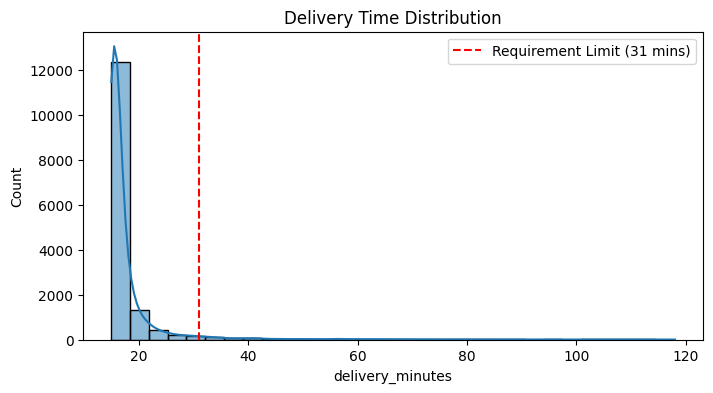

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["delivery_minutes"], bins=30, kde=True)
plt.axvline(31, color="red", linestyle="--", label="Requirement Limit (31 mins)")
plt.legend()
plt.title("Delivery Time Distribution")
plt.show()

## Hour perfmanc

In [ ]:
df["order_hour"] = df["order_placed_at"].dt.hour

In [ ]:
per95_hour = df.groupby("order_hour")["delivery_minutes"].quantile(0.95)
per95_hour

,delivery_minutes
order_hour,
0,26.030774
1,29.808279
2,25.687414
3,25.035778
4,25.642007
5,23.404148
6,26.467653
7,26.892749
8,26.306193


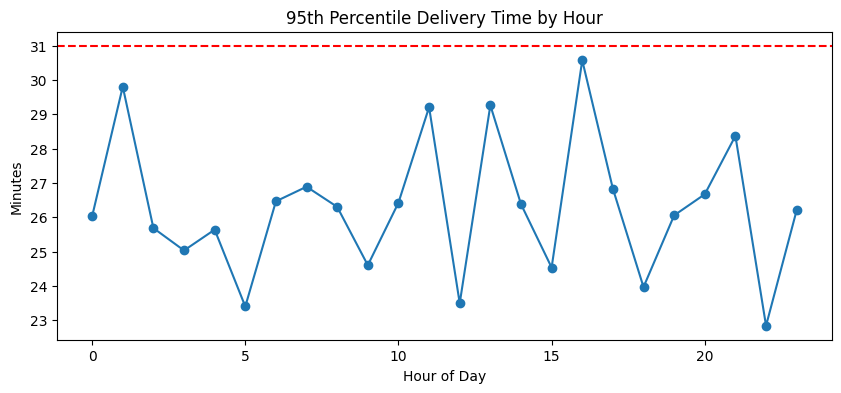

In [ ]:
plt.figure(figsize=(10,4))
per95_hour.plot(marker="o")
plt.axhline(31, color="red", linestyle="--")
plt.title("95th Percentile Delivery Time by Hour")
plt.ylabel("Minutes")
plt.xlabel("Hour of Day")
plt.show()

# Results

• Delivery is being on time so Overall Requirement is met

• Hourly delivery crosses the allowed limit

• Late night & brfore lunch hour delivery are slower mean risk factor

• large deliver time exists which means Extreme outliers  and suggest data quality issues means there is error or missing data

# Help

1. Increase delivery staff during peak-risk hours  
2. Automatically Identify orders taking more then 90 minutes   
3. Monitor hourly 95th percentile instead of averages
4. Maintain pizza ingredients batches during risky hours
